In [201]:
#Import the data
import os
import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pmdarima.arima as pm
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose 
os.chdir('C:/Users/n8smi/Documents')
data = pd.read_csv("medical_time_series .csv")
print(data.head(5))
print(data.describe())
print(data.shape)

   Day   Revenue
0    1  0.000000
1    2 -0.292356
2    3 -0.327772
3    4 -0.339987
4    5 -0.124888
              Day     Revenue
count  731.000000  731.000000
mean   366.000000   14.179608
std    211.165812    6.959905
min      1.000000   -4.423299
25%    183.500000   11.121742
50%    366.000000   15.951830
75%    548.500000   19.293506
max    731.000000   24.792249
(731, 2)


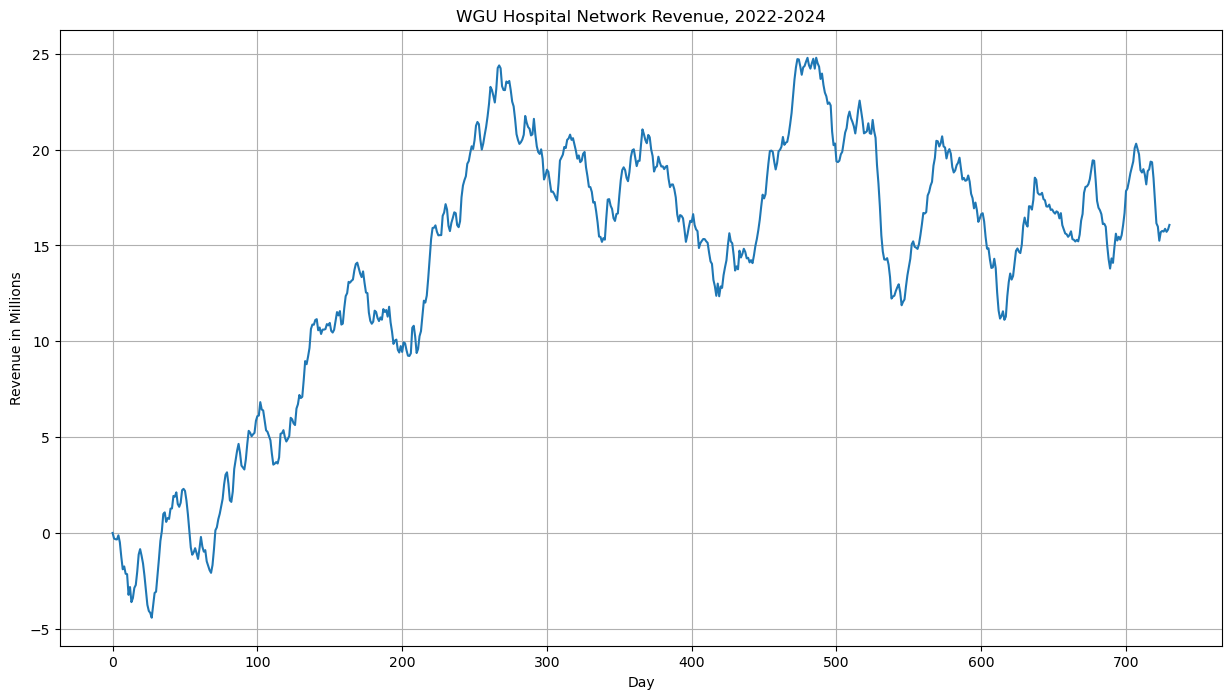

In [203]:
#Line Graph to visualize the data
plt.figure(figsize=(15,8))
plt.plot(data.Revenue)
plt.title('WGU Hospital Network Revenue, 2022-2024')
plt.xlabel('Day')
plt.ylabel('Revenue in Millions')
plt.grid(True)

In [205]:
#Converte data from days to DateTime
data['Date'] = (pd.date_range(start=datetime.datetime(2022,1,1),
                              periods=data.shape[0],freq='D'))
data.set_index('Date',inplace=True)
print(data.head(10))
print(data.shape)

            Day   Revenue
Date                     
2022-01-01    1  0.000000
2022-01-02    2 -0.292356
2022-01-03    3 -0.327772
2022-01-04    4 -0.339987
2022-01-05    5 -0.124888
2022-01-06    6 -0.491590
2022-01-07    7 -1.255250
2022-01-08    8 -1.896279
2022-01-09    9 -1.747259
2022-01-10   10 -2.129558
(731, 2)


In [207]:
#Drop Day Column
data.drop('Day', axis=1, inplace=True)
print(data.head())

             Revenue
Date                
2022-01-01  0.000000
2022-01-02 -0.292356
2022-01-03 -0.327772
2022-01-04 -0.339987
2022-01-05 -0.124888


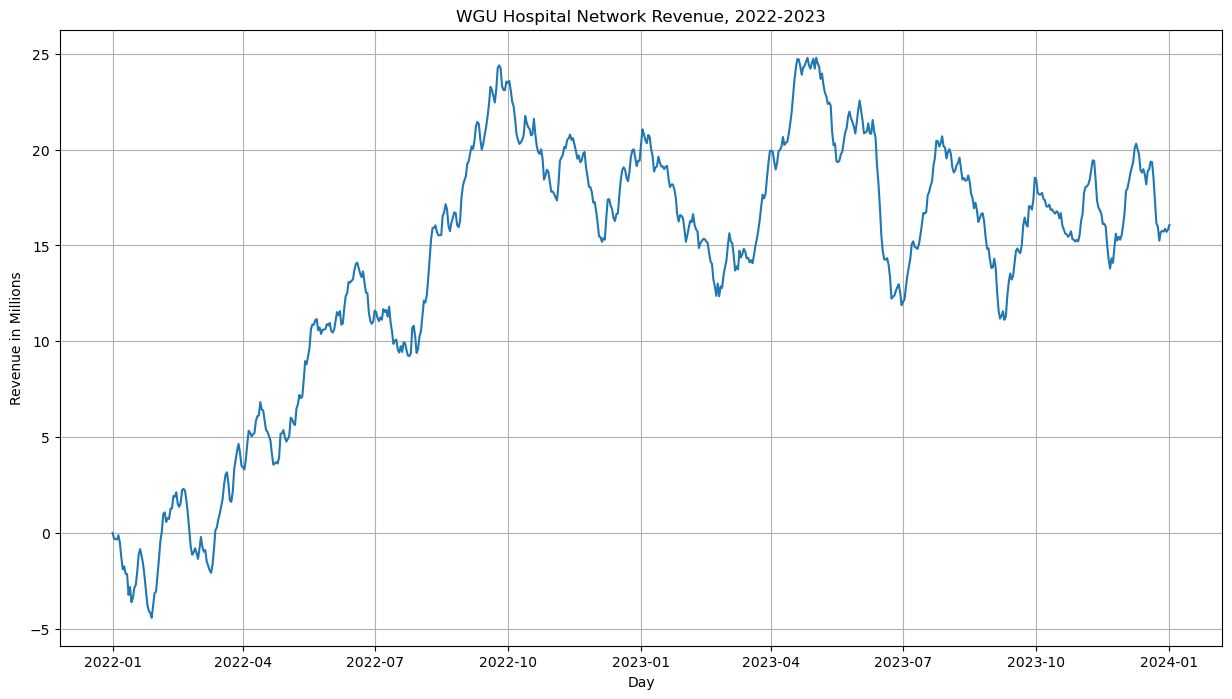

In [209]:
#Line Graph to visualize the data
plt.figure(figsize=(15,8))
plt.plot(data.Revenue)
plt.title('WGU Hospital Network Revenue, 2022-2023')
plt.xlabel('Day')
plt.ylabel('Revenue in Millions')
plt.grid(True)

In [211]:
#Cleaning the Data
#Missing Values
print(data.isna().sum())
#Null values
data.isnull().any()

Revenue    0
dtype: int64


Revenue    False
dtype: bool

In [213]:
data.shape

(731, 1)

In [215]:
#Checking Stationarity
adfuller_result = adfuller(data['Revenue'])
print('Test Statistics from ADFuller Test: ',adfuller_result[0])
print('P-value of ADFuller Test: ', adfuller_result[1])
print('Critical Values of ADFuller Test: ', adfuller_result[4])

if adfuller_result[1]<=0.05:
    print('Reject the null hypothesis, the time series is stationary')
else:
    print('Fail to reject null hypothesis, the time series is non-stationary')

Test Statistics from ADFuller Test:  -2.218319047608944
P-value of ADFuller Test:  0.1996640061506439
Critical Values of ADFuller Test:  {'1%': -3.4393520240470554, '5%': -2.8655128165959236, '10%': -2.5688855736949163}
Fail to reject null hypothesis, the time series is non-stationary


In [217]:
#Time series to Stationary through differencing
data_stationary = data.diff().dropna()

print(data_stationary.head(5))

             Revenue
Date                
2022-01-02 -0.292356
2022-01-03 -0.035416
2022-01-04 -0.012215
2022-01-05  0.215100
2022-01-06 -0.366702


In [219]:
#Re-run the adfuller test for differenced data to test for stationarity
adfuller_dif_result = adfuller(data_stationary['Revenue'])
print('Test Statistics from ADFuller Test: ',adfuller_dif_result[0])
print('P-value of ADFuller Test: ',adfuller_dif_result[1])
print('Critical Values of ADFuller Test: ',adfuller_dif_result[4])

if adfuller_dif_result[1]<=0.05:
    print('Reject the null hypothesis, the time series is stationary')
else:
    print('Fail to reject null hypothesis, the time series is non-stationary')

Test Statistics from ADFuller Test:  -17.37477230355706
P-value of ADFuller Test:  5.1132069788403175e-30
Critical Values of ADFuller Test:  {'1%': -3.4393520240470554, '5%': -2.8655128165959236, '10%': -2.5688855736949163}
Reject the null hypothesis, the time series is stationary


In [221]:
#Splitting the data
x_train = data.loc[:'2023-09-30']
x_test = data.loc['2023-10-01':]
print(x_train.shape)
print(x_test.shape)
X_train = data_stationary.loc[:'2023-09-30']
X_test = data_stationary.loc['2023-10-01':]

(638, 1)
(93, 1)


Text(0.5, 1.0, 'Spectral Density of Revenue')

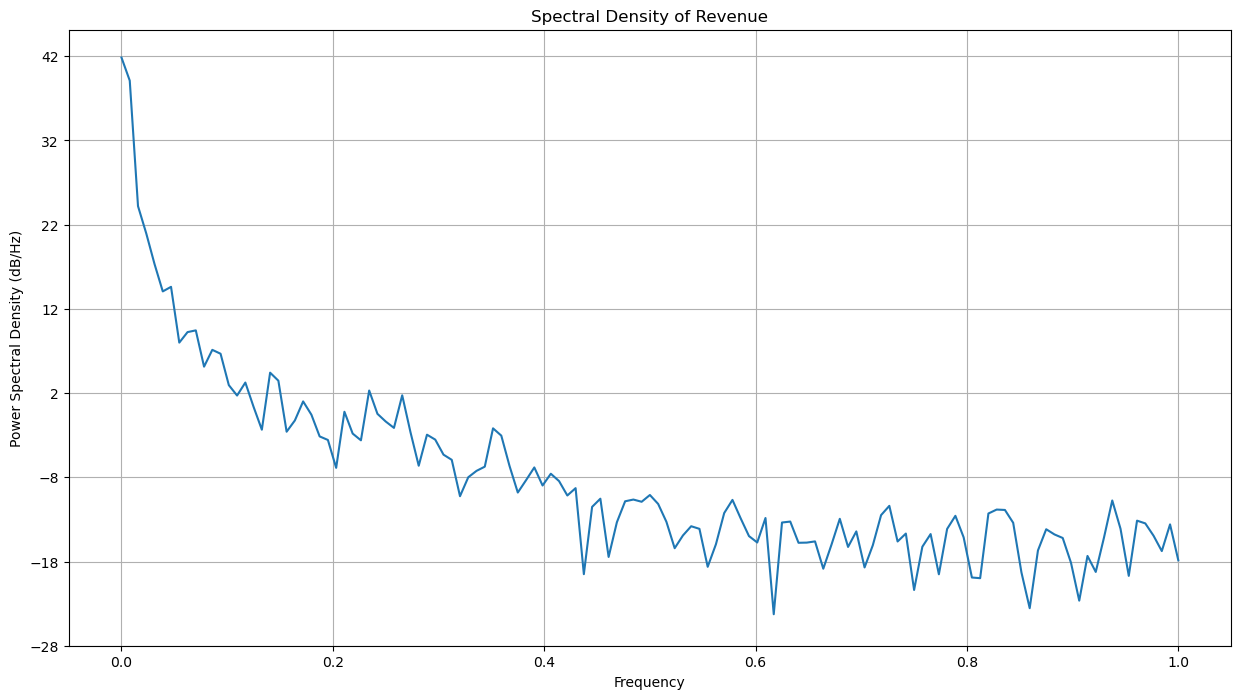

In [223]:
#Visulize Spectral Density
plt.figure(figsize = (15,8), linewidth=3)
plt.psd(data['Revenue'])
plt.title('Spectral Density of Revenue')

<Axes: xlabel='Date'>

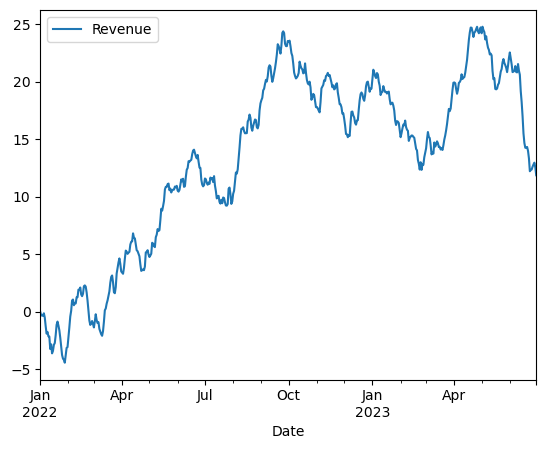

In [225]:
#Seasonality
data.loc[:'2023-06-30'].plot()

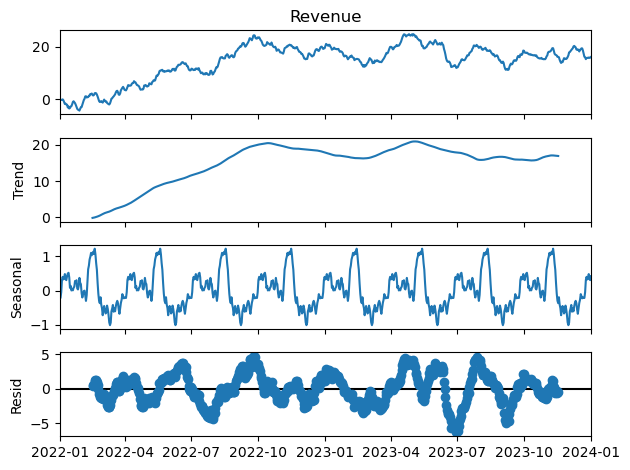

In [230]:
#decomposition
decomposition = seasonal_decompose(data['Revenue'], period = 90)
decomposition.plot()
plt.show()

Text(0.5, 1.0, 'Seasonality')

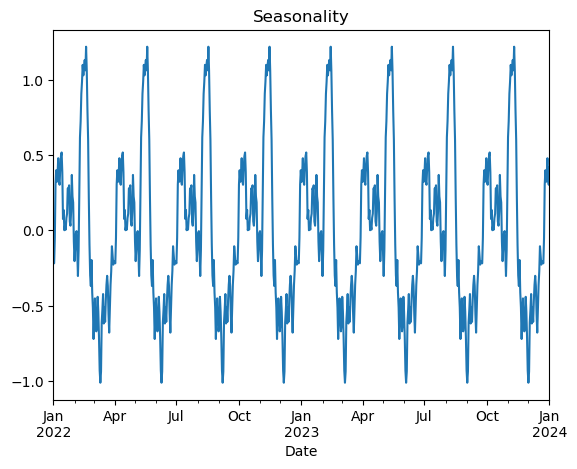

In [234]:
#Seasonality
decomposition.seasonal.plot()
plt.title('Seasonality')

Text(0.5, 1.0, 'Trend')

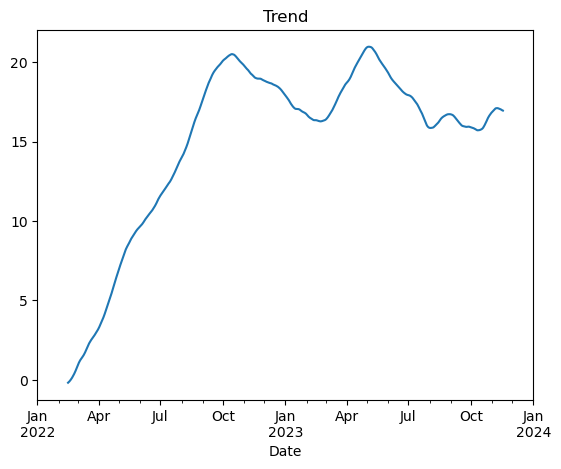

In [240]:
#Trend
decomposition.trend.plot()
plt.title('Trend')

Text(0.5, 1.0, 'Residuals')

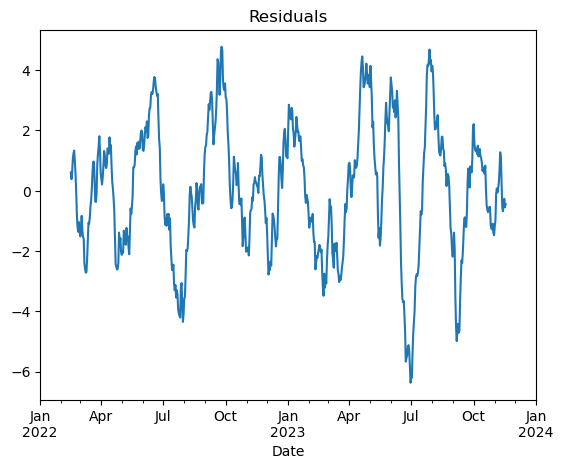

In [242]:
#Residuals
decomposition.resid.plot()
plt.title('Residuals')

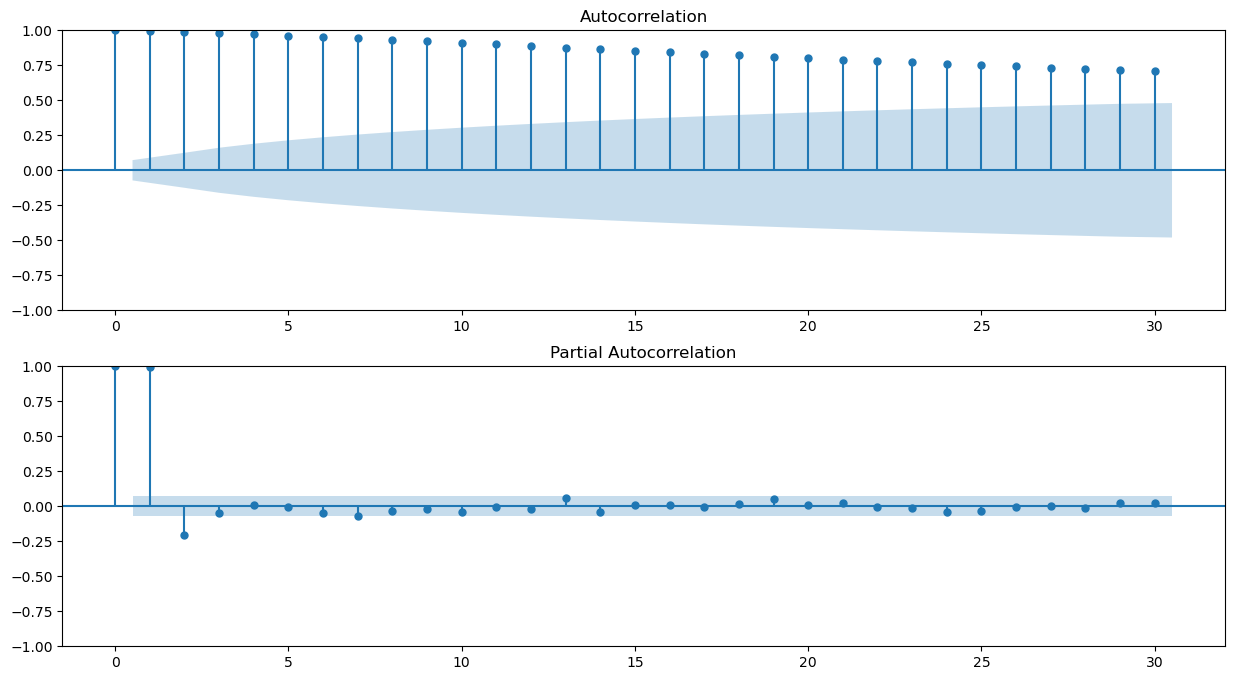

In [245]:
#Graph ACF & PACF
figure = plt.figure(figsize=(15,8))
ax1 = figure.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(data.Revenue,lags=30,ax=ax1)

ax2 = figure.add_subplot(212)
figure = sm.graphics.tsa.plot_pacf(data.Revenue,lags=30,ax=ax2)
plt.show()

In [267]:
#Use Auto-ARIMA to find the best model
model = pm.auto_arima(data,
                      seasonal = True, m=90,
                      d=1, D=1,
                      start_p=1, start_q=1,
                      max_p=2, max_q=2,
                      max_P=2, max_Q=2,
                      trace=True,
                      error_actions='ignore',
                      suppress_warnings = True)
print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(1,1,1)[90]             : AIC=inf, Time=599.09 sec
 ARIMA(0,1,0)(0,1,0)[90]             : AIC=1344.172, Time=37.91 sec
 ARIMA(1,1,0)(1,1,0)[90]             : AIC=inf, Time=57.89 sec
 ARIMA(0,1,1)(0,1,1)[90]             : AIC=inf, Time=312.91 sec
 ARIMA(0,1,0)(1,1,0)[90]             : AIC=inf, Time=21.29 sec
 ARIMA(0,1,0)(0,1,1)[90]             : AIC=inf, Time=1786.90 sec
 ARIMA(0,1,0)(1,1,1)[90]             : AIC=inf, Time=472.56 sec
 ARIMA(1,1,0)(0,1,0)[90]             : AIC=1228.526, Time=7.08 sec
 ARIMA(1,1,0)(0,1,1)[90]             : AIC=inf, Time=380.30 sec
 ARIMA(1,1,0)(1,1,1)[90]             : AIC=inf, Time=594.47 sec
 ARIMA(2,1,0)(0,1,0)[90]             : AIC=1230.491, Time=8.36 sec
 ARIMA(1,1,1)(0,1,0)[90]             : AIC=1230.496, Time=12.25 sec
 ARIMA(0,1,1)(0,1,0)[90]             : AIC=1247.950, Time=15.19 sec
 ARIMA(2,1,1)(0,1,0)[90]             : AIC=1231.394, Time=51.26 sec
 ARIMA(1,1,0)(0,1,0)[90] intercept   : A

In [271]:
from statsmodels.tsa.statespace.sarimax import SARIMAX 
model = SARIMAX(data, order = (1,1,0), seasonal_order = (0,1,0,90))
results = model.fit()
results.summary()

C:\Users\n8smi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\n8smi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                            Revenue   No. Observations:                  731
Model:             SARIMAX(1, 1, 0)x(0, 1, 0, 90)   Log Likelihood                -612.263
Date:                            Sat, 23 Nov 2024   AIC                           1228.526
Time:                                    00:47:42   BIC                           1237.449
Sample:                                01-01-2022   HQIC                          1231.990
                                     - 01-01-2024                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4095      0.037     11.080      0.000       0.337       0.482
sigma2         0.3966      0.023     17.137      0.000       0.351       0.442
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 0.66
Prob(Q):                              0.95   Prob(JB):                         0.72
Heteroskedasticity (H):               1.15   Skew:                            -0.00
Prob(H) (two-sided):                  0.32   Kurtosis:                         2.84
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

0.5028112437553706


C:\Users\n8smi\AppData\Local\Temp\ipykernel_35876\2216093569.py:4: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  results.plot_diagnostics().show()


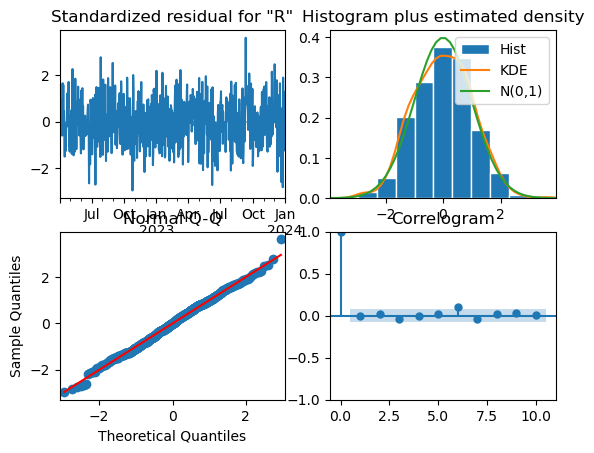

In [273]:
#Mean Absolute Error 
mae = np.mean(np.abs(results.resid))
print(mae)
results.plot_diagnostics().show()

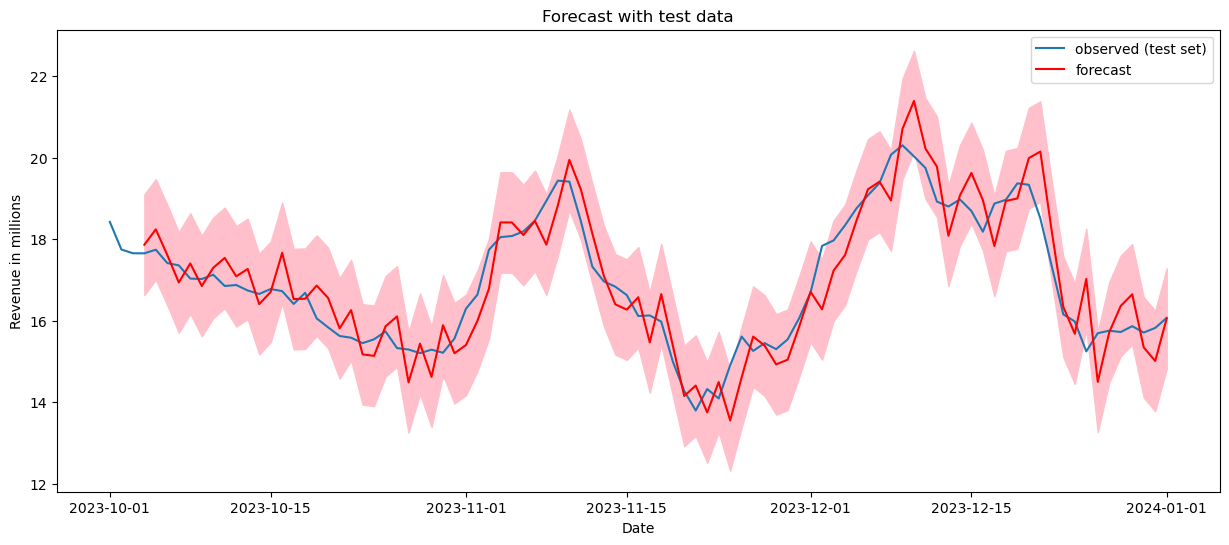

In [275]:
#Run the Forecast
predict = results.get_prediction(start=-90)
#Get prediction mean
mean_predict = predict.predicted_mean
#Find Confidence Intervals
conf_inter = predict.conf_int()
#Set upper and lower bounds
lower_bound = conf_inter.loc[:,'lower Revenue']
upper_bound = conf_inter.loc[:,'upper Revenue']

#Put the forecast on a plot
plt.figure(figsize=(15,6))
plt.plot(x_test.index, x_test, label = 'observed (test set)')
#Add in the mean_predict
plt.plot(mean_predict.index, mean_predict, color = 'r', label = 'forecast')
#shade area between confidence limits 
plt.fill_between(lower_bound.index, lower_bound, upper_bound, color = 'pink')
plt.title('Forecast with test data')
plt.xlabel('Date')
plt.ylabel('Revenue in millions')
plt.legend()

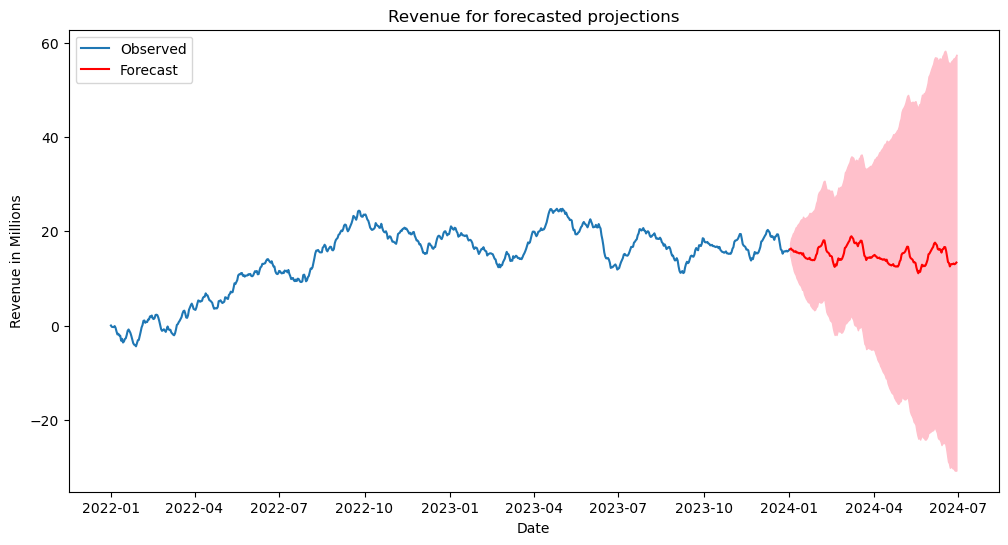

In [277]:
diff_forecast = results.get_forecast(steps=180)
mean_forecast = diff_forecast.predicted_mean
#confidence intervals
confidence_intervals = diff_forecast.conf_int()
#Lower and upper limits
lower_limits = confidence_intervals.loc[:,'lower Revenue']
upper_limits = confidence_intervals.loc[:,'upper Revenue']

plt.figure(figsize = (12,6))
plt.plot(data.index,data,label='Observed')
#mean predictions
plt.plot(mean_forecast.index,mean_forecast, color = 'r', label = 'Forecast')
plt.fill_between(lower_limits.index, lower_limits, upper_limits, color = 'pink')

plt.title('Revenue for forecasted projections')
plt.xlabel('Date')
plt.ylabel('Revenue in Millions')
plt.legend()
plt.show()

In [279]:
results.forecast(180)

2024-01-02    16.206997
2024-01-03    16.352943
2024-01-04    16.048081
2024-01-05    16.000972
2024-01-06    15.680338
                ...    
2024-06-25    13.020258
2024-06-26    13.164024
2024-06-27    13.007190
2024-06-28    13.121070
2024-06-29    13.367632
Freq: D, Name: predicted_mean, Length: 180, dtype: float64

In [343]:
forecast = results.get_forecast(93)
forecast_df = forecast.summary_frame()  # Converts the forecast into a DataFrame
print(forecast_df)

Revenue          mean    mean_se  mean_ci_lower  mean_ci_upper
2024-01-02  16.206997   0.629752      14.972706      17.441289
2024-01-03  16.352943   1.088357      14.219801      18.486084
2024-01-04  16.048081   1.473472      13.160128      18.936034
2024-01-05  16.000972   1.801533      12.470033      19.531911
2024-01-06  15.680338   2.087332      11.589242      19.771433
...               ...        ...            ...            ...
2024-03-30  14.471969   9.994404      -5.116703      34.060641
2024-03-31  14.718531  10.051149      -4.981360      34.418422
2024-04-01  14.856098  10.193281      -5.122366      34.834563
2024-04-02  15.002044  10.378913      -5.340252      35.344340
2024-04-03  14.697182  10.581335      -6.041854      35.436218

[93 rows x 4 columns]


In [349]:
y_actual = x_test['Revenue']
y_pred = forecast_df['mean']
mean_se = mse(y_actual, y_pred)
print (mean_se)

rmse = np.sqrt(mean_se)
print(rmse)

3.1087181244042794
1.763155728914573


In [283]:
#ARIMA Summary
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                            Revenue   No. Observations:                  731
Model:             SARIMAX(1, 1, 0)x(0, 1, 0, 90)   Log Likelihood                -612.263
Date:                            Sat, 23 Nov 2024   AIC                           1228.526
Time:                                    10:26:54   BIC                           1237.449
Sample:                                01-01-2022   HQIC                          1231.990
                                     - 01-01-2024                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4095      0.037     11.080      0.000       0.337       0.482
sigma2         0.3966      0.023     17.137      0.000       0.351       0.442
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 0.66
Prob(Q):                              0.95   Prob(JB):                         0.72
Heteroskedasticity (H):               1.15   Skew:                            -0.00
Prob(H) (two-sided):                  0.32   Kurtosis:                         2.84
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [367]:
# Generate Predictions
prediction = results.get_prediction(start=-90)

mean_prediction = prediction.predicted_mean

confidence_intervals = prediction.conf_int()

lower_limits = confidence_intervals.loc[:,'lower Revenue']
upper_limits = confidence_intervals.loc[:,'upper Revenue']

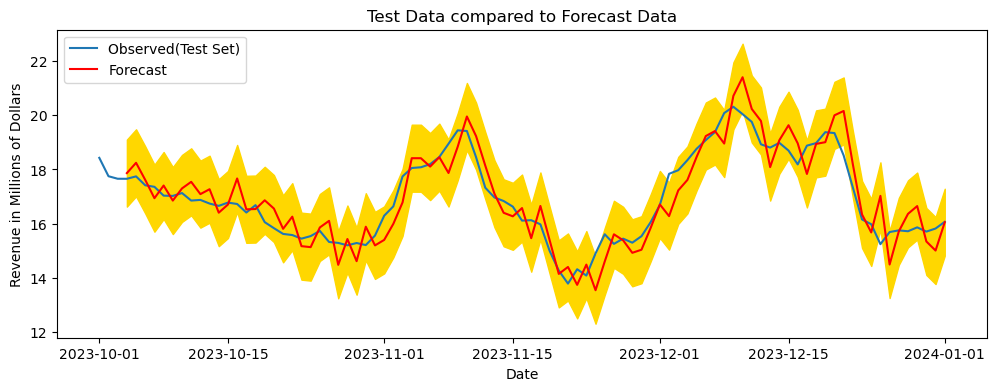

In [387]:
plt.figure(figsize=(12,4))
plt.plot(x_test.index, x_test, label='Observed(Test Set)')
plt.plot(mean_prediction.index, mean_prediction, color = 'r', label = 'Forecast')
plt.fill_between(lower_limits.index, lower_limits, upper_limits, color = 'gold')
plt.title('Test Data compared to Forecast Data')
plt.xlabel('Date')
plt.ylabel('Revenue in Millions of Dollars')
plt.legend()